In [1]:
import sys
#sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#import mplhep
from matplotlib.colors import LogNorm
import joblib
from joblib import dump, load

print ( "numpy: {}".format(np.__version__) )
print ( "joblib: {}".format(joblib.__version__) )

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

print ( "sklearn: {}".format(sklearn.__version__) )

['/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python38.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.8.6-3199b/x86_64-centos7-gcc8-opt/lib/python3.8/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/IPython/extensions', '/scratch/antoniov/.ipython']
numpy: 1.18.2
joblib: 0.14.0
sklearn: 0.23.2


In [2]:
# get_data, process_data, fiducial_cuts, fiducial_cuts_all, aperture_parametrisation, check_aperture
from processing import *

#proton_selection = "SingleRP"
proton_selection = "MultiRP"

run_tables = False

run_random_experiments = False

train_model = True
run_grid_search = True
save_model = True

model_path = ""
if not train_model:
    model_path = "model/"

### Signal

In [3]:
label = "Elastic"

fileNames_signal = [
    'output/output-MC2017-Elastic-Non3+3-PreSel.h5',
    #'output/output-MC2017-SingleDissociation-Non3+3-PreSel.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_signal, df_signal = 2 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_signal_, df_signal_ = get_data( fileNames_signal )
        df_signal_ = process_data( df_signal_, proton_selection, min_mass = 110. )
        
        store_[ "counts" ] = df_counts_signal_
        store_[ "df"] = df_signal_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_signal = store_[ "counts" ]
    df_signal = store_[ "df"]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/04/15 18:35:50
Total time elapsed: 0


In [4]:
df_counts_signal

All        178402
Muon       166756
Vertex     149608
Protons     91429
dtype: int64

In [5]:
df_signal

,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu,xlow,xhigh,ylow,yhigh
3,1,1,3,0,150.0,1,1,103,123,7.630859,...,251.395355,16,0.000880,0.004588,0.081510,0.081510,2.422,24.620,-9.698,4.698
6,1,1,12,0,150.0,1,0,3,23,5.149414,...,126.690613,4,0.001160,0.055618,0.001708,0.055618,1.995,24.334,-10.098,4.298
16,1,1,17,0,150.0,1,1,103,123,3.828247,...,263.130524,1,0.000028,0.008177,0.050104,0.050104,2.422,24.620,-9.698,4.698
19,1,1,30,0,150.0,1,0,3,23,5.139893,...,176.417725,1,0.001032,0.046055,0.003999,0.046055,1.995,24.334,-10.098,4.298
24,1,1,13,0,150.0,1,1,103,123,2.742798,...,233.975662,17,0.000317,0.007711,0.042010,0.042010,2.422,24.620,-9.698,4.698
27,1,1,31,0,150.0,1,1,103,123,5.258789,...,266.681091,0,0.001807,0.006805,0.061971,0.061971,2.422,24.620,-9.698,4.698
30,1,1,37,0,150.0,1,0,3,23,4.975342,...,176.964508,0,0.000757,0.054292,0.003414,0.054292,1.995,24.334,-10.098,4.298
42,1,1,52,0,150.0,1,0,3,23,7.566895,...,1466.510620,2,0.000317,0.072588,0.175365,0.072588,1.995,24.334,-10.098,4.298
43,1,1,52,0,150.0,1,1,103,123,11.388184,...,1466.510620,2,0.000317,0.072588,0.175365,0.175365,2.422,24.620,-9.698,4.698
46,1,1,57,0,150.0,1,1,103,123,3.813232,...,115.234695,0,0.000651,0.001538,0.051120,0.051120,2.422,24.620,-9.698,4.698


In [6]:
L_B  = 2.360904801;
L_C1 = 5.313012839;
L_E  = 8.958810514;
L_F1 = 1.708478656;
lumi_periods = {}
lumi_periods[ "2017B" ]  = L_B
lumi_periods[ "2017C1" ] = L_C1
lumi_periods[ "2017E" ]  = L_E
lumi_periods[ "2017F1" ] = L_F1
print ( lumi_periods )
lumi_total = np.sum( list( lumi_periods.values() ) )
print ( "Total luminosity = {}".format( lumi_total ) )

{'2017B': 2.360904801, '2017C1': 5.313012839, '2017E': 8.958810514, '2017F1': 1.708478656}
Total luminosity = 18.34120681


### Random experiments

In [7]:
if run_random_experiments:
    from random_experiment import *
    
    np.random.seed( 42 )

    # per period, arm
    systematics = {}
    #systematics[ "Xi" ] = ( systematics_Xi_X, systematics_Xi_Y )
    #systematics[ "Xi" ] = get_systematics_vs_xi_ROOT( data_periods, fileName="reco_characteristics/reco_characteristics_version1.root" )
    systematics[ "Xi" ] = get_systematics_vs_xi_h5( data_periods, fileName="reco_characteristics/reco_characteristics_version1.h5" )
   
    print ( systematics )
    
    random_experiment( df_signal, data_periods=data_periods, lumi_weights=lumi_periods, variables=[ "Xi" ], variations=systematics )
    

In [8]:
if run_random_experiments:
    print ( df_signal[ [ "Run", "LumiSection", "EventNum", "Arm", "Xi", "period_rnd", "sigma_Xi", "Xi_smeared"] ] )

### Background

In [9]:
resample_factor = 20
label = "data_random_resample_20"

fileNames_bkg = [
    'output/output-UL2017B-PreSel-Rnd-Res20.h5',
    'output/output-UL2017C1-PreSel-Rnd-Res20.h5',
    'output/output-UL2017E-PreSel-Rnd-Res20_0.h5',
    'output/output-UL2017E-PreSel-Rnd-Res20_1.h5',
    'output/output-UL2017F1-PreSel-Rnd-Res20.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_bkg, df_bkg = 2 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_bkg_list_ = []
        df_bkg_list_ = []
        for file_ in fileNames_bkg:
            df_counts_bkg_, df_bkg_ = get_data( [ file_ ] )
            df_bkg_ = process_data( df_bkg_, proton_selection, min_mass = 110., within_aperture=True )
            df_counts_bkg_list_.append( df_counts_bkg_ )
            df_bkg_list_.append( df_bkg_ )

        df_counts_bkg_ = df_counts_bkg_list_[0]
        for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
            df_counts_bkg_ = df_counts_bkg_.add( df_counts_bkg_list_[idx_] )

        df_bkg_ = pd.concat( df_bkg_list_ )
        
        store_[ "counts" ] = df_counts_bkg_
        store_[ "df" ] = df_bkg_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_bkg = store_[ "counts" ]
    df_bkg = store_[ "df" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/04/15 18:36:21
Total time elapsed: 1


In [10]:
df_counts_bkg

All           869119560
Muon            8456020
Vertex          7782360
ProtonsRnd      6301680
dtype: int64

In [11]:
df_bkg

,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu,period,within_aperture,xlow,xhigh,ylow,yhigh
10,297227,56,38791640,0,120.0,1,0,3,23,7.063232,...,0.058782,0.002211,0.062855,0.002211,2017B,True,1.995,24.334,-10.098,4.298
20,297227,58,40362008,0,120.0,1,0,3,23,7.391113,...,0.271141,0.028539,0.011619,0.028539,2017B,True,1.995,24.334,-10.098,4.298
33,297227,60,41478176,0,120.0,1,0,3,23,6.782959,...,0.157789,0.035037,0.018197,0.035037,2017B,True,1.995,24.334,-10.098,4.298
47,297227,63,44189296,0,120.0,1,0,3,23,13.382812,...,0.008506,0.033806,0.010684,0.033806,2017B,True,1.995,24.334,-10.098,4.298
69,297227,73,52238048,0,120.0,1,1,103,123,8.629883,...,0.060892,0.014483,0.008333,0.008333,2017B,True,2.422,24.620,-9.698,4.698
84,297227,75,53449356,0,120.0,1,1,103,123,5.546875,...,0.023202,0.019344,0.007848,0.007848,2017B,True,2.422,24.620,-9.698,4.698
93,297227,76,54126336,0,120.0,1,0,3,23,8.200684,...,0.145185,0.049092,0.006129,0.049092,2017B,True,1.995,24.334,-10.098,4.298
111,297227,78,55898044,0,120.0,1,1,103,123,3.611084,...,0.273834,0.032531,0.003312,0.003312,2017B,True,2.422,24.620,-9.698,4.698
118,297227,79,56863080,0,120.0,1,1,103,123,3.396606,...,0.026694,0.001631,0.059633,0.059633,2017B,True,2.422,24.620,-9.698,4.698
138,297227,86,61943160,0,120.0,1,0,3,23,7.637451,...,0.095938,0.016999,0.009692,0.016999,2017B,True,1.995,24.334,-10.098,4.298


### Set aside test sample

In [12]:
from sklearn.model_selection import train_test_split

y_sig_ = np.ones( df_signal.shape[0] )
y_bkg_ = np.zeros( df_bkg.shape[0] )

df_signal_train, df_signal_test, y_sig_train, y_sig_test = train_test_split( df_signal, y_sig_, test_size=0.40, shuffle=True, random_state=12345 )
df_bkg_train, df_bkg_test, y_bkg_train, y_bkg_test = train_test_split( df_bkg, y_bkg_, test_size=0.40, shuffle=True, random_state=12345 )

print ( df_signal_train, df_signal_test, y_sig_train, y_sig_test )
print ( df_bkg_train, df_bkg_test, y_bkg_train, y_bkg_test )

        Run  LumiSection  EventNum  Slice  CrossingAngle  MultiRP  Arm  RPId1  \
7184      1          764     76394      0          120.0        1    0      3   
134812    1         1698    169732      0          150.0        1    1    103   
198101    1          414     41334      0          130.0        1    1    103   
45399     1         1124    112389      0          130.0        1    1    103   
1743      1           17      1693      0          150.0        1    0      3   
121218    1         1573    157270      0          120.0        1    1    103   
15170     1          841     84012      0          120.0        1    1    103   
37604     1         1049    104823      0          150.0        1    1    103   
210846    1          732     73107      0          150.0        1    0      3   
117203    1         1522    152180      0          120.0        1    1    103   
28055     1          961     96012      0          130.0        1    0      3   
86475     1         1251    

           Run  LumiSection    EventNum  Slice  CrossingAngle  MultiRP  Arm  \
584610  304169          775  1174086912     15          130.0        1    1   
305145  300375           71   110011792     10          140.0        1    0   
665428  297219          184   377924896      4          150.0        1    0   
988550  304209          366   622661056     12          140.0        1    1   
696031  297219          690  1276009216      6          130.0        1    0   
611262  304447         1056  1711461760      8          120.0        1    1   
106992  299481          305   363365184      0          120.0        1    0   
802514  304654          407   657480768      8          130.0        1    1   
391423  300576          119   174375040      8          140.0        1    1   
688733  305045          278   484990912     14          140.0        1    1   
886189  300280          635   846633792      5          140.0        1    0   
691408  305112          628  1070034240      8      

In [13]:
print ( [ arr_.shape[0] for arr_ in ( df_signal_train, df_signal_test, y_sig_train, y_sig_test ) ] )
print ( [ arr_.shape[0] for arr_ in ( df_bkg_train, df_bkg_test, y_bkg_train, y_bkg_test ) ] )
print ( df_signal_test.mean() )
# print ( df_bkg_test.mean() )

[28830, 19221, 28830, 19221]
[727796, 485198, 727796, 485198]
Run                       1.000000e+00
LumiSection               1.004417e+03
EventNum                  1.003923e+05
Slice                     0.000000e+00
CrossingAngle             1.335316e+02
MultiRP                   1.000000e+00
Arm                       4.798918e-01
RPId1                     5.098918e+01
RPId2                     7.098918e+01
TrackX1                   5.360522e+00
TrackY1                   8.681382e-01
TrackX2                   5.378507e+00
TrackY2                   9.039768e-01
TrackThX_SingleRP        -9.990000e+02
TrackThY_SingleRP        -9.990000e+02
Track1ThX_MultiRP        -6.571191e-06
Track1ThY_MultiRP         7.334872e-06
Track2ThX_MultiRP        -7.935825e-06
Track2ThY_MultiRP         6.452781e-06
TrackPixShift_SingleRP   -1.000000e+00
Track1PixShift_MultiRP    0.000000e+00
Track2PixShift_MultiRP    0.000000e+00
Xi                        5.838119e-02
T                        -1.802354e-01
Th

### Select variables

In [14]:
# X_sig = df_signal[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
X_sig_train = None
X_sig_test = None
if run_random_experiments:
    X_sig_train = df_signal_train[ ['Xi_smeared', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ].rename( columns={ "Xi_smeared": "Xi" } )
    X_sig_test = df_signal_test[ ['Xi_smeared', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ].rename( columns={ "Xi_smeared": "Xi" } )
else:
    X_sig_train = df_signal_train[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
    X_sig_test = df_signal_test[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
X_sig_train

,Xi,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMu
7184,0.040329,73.456902,72.462585,178.602219,1,0.000010,0.040151
134812,0.039064,77.487175,76.224182,153.753983,2,0.000206,0.037886
198101,0.041670,63.803547,62.695671,166.183243,0,0.000691,0.043130
45399,0.058295,53.412079,52.910538,126.224342,1,0.000256,0.056360
1743,0.043040,53.542686,50.286655,125.001396,0,0.001747,0.041338
121218,0.040292,54.416470,54.017834,127.565163,0,0.002157,0.041076
15170,0.072571,67.009575,66.574005,138.386398,1,0.000247,0.070304
37604,0.065533,122.996933,120.216347,262.177338,0,0.000288,0.068566
210846,0.053142,67.908630,67.161713,135.474152,5,0.000149,0.050503
117203,0.055398,60.326309,59.703342,166.485199,2,0.000219,0.054283


In [15]:
X_bkg_train = df_bkg_train[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
X_bkg_test = df_bkg_test[ ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu'] ]
X_bkg_train

,Xi,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMu
584610,0.057389,72.875313,55.133251,139.115662,18,0.107399,0.018423
305145,0.043718,110.621307,105.858086,239.736038,41,0.105640,0.051889
665428,0.096003,248.045914,129.451035,247.146591,13,0.552615,0.006062
988550,0.120712,154.062881,99.193192,416.161377,26,0.019761,0.016469
696031,0.111822,179.805893,176.773315,373.322815,11,0.017037,0.008327
611262,0.060924,77.290184,64.635056,148.078384,31,0.005014,0.003526
106992,0.032264,55.543747,53.829002,113.869637,31,0.030717,0.031280
802514,0.076775,86.059380,57.181171,157.845184,44,0.002613,0.002303
391423,0.052201,60.528744,55.078896,185.600433,22,0.000453,0.021551
688733,0.128419,58.373783,54.912369,113.674355,41,0.028492,0.004507


In [16]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, shuffle=True, random_state=42 )

In [17]:
X_ = pd.concat( [X_sig_train, X_bkg_train] ) 
y_ = np.concatenate( [y_sig_train, y_bkg_train] )

X_train, X_valid, y_train, y_valid = train_test_split( X_, y_, test_size=0.10, shuffle=True, random_state=42 )

In [18]:
X_train

,Xi,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMu
741275,0.078683,57.636303,51.554951,124.287964,21,0.053607,0.016544
585259,0.102040,67.292381,65.995605,137.128799,53,0.058774,0.006110
511724,0.092966,66.782806,64.257668,132.336166,19,0.023437,0.005671
707438,0.040225,66.812828,63.646507,153.440033,17,0.026346,0.036175
235209,0.059599,54.942883,53.703773,117.774078,46,0.001449,0.022008
891360,0.090655,94.874901,50.292301,117.757858,54,0.401966,0.005555
213676,0.055078,127.696388,98.236435,224.254562,54,0.023068,0.022884
185192,0.065648,70.065590,57.053913,124.911552,28,0.103608,0.016202
319727,0.085084,103.346794,74.958870,173.996933,27,0.115510,0.023727
271235,0.041693,86.132011,75.323837,183.717041,40,0.081093,0.051138


In [19]:
X_test = pd.concat( [X_sig_test, X_bkg_test] ) 
y_test = np.concatenate( [y_sig_test, y_bkg_test] )

In [20]:
X_test

,Xi,Muon0Pt,Muon1Pt,InvMass,ExtraPfCands,Acopl,XiMuMu
99234,0.076666,299.772003,293.133179,783.843018,3,8.626284e-07,0.077529
140279,0.041093,141.848022,139.301285,400.948456,12,5.804421e-04,0.042499
190165,0.055388,84.725891,83.376411,223.688828,3,2.251787e-04,0.056514
148266,0.051295,96.573059,96.415550,218.593445,0,7.299701e-05,0.049608
44734,0.048346,52.776470,52.612209,111.511894,5,6.226767e-04,0.047299
205320,0.098880,117.329910,113.676643,236.842682,6,2.636554e-04,0.100070
111452,0.052445,52.369503,52.356544,120.156525,1,1.043757e-03,0.052469
84328,0.043292,52.813648,52.537960,151.280701,0,1.070642e-03,0.041663
191766,0.075327,57.417480,53.987713,116.916412,0,7.648572e-04,0.070977
7014,0.073473,78.993111,73.476295,155.143829,0,3.987060e-05,0.074484


In [21]:
np.sum( y_train == 1 ) / y_train.size

0.03815919513982404

In [22]:
np.sum( y_valid == 1 ) / y_valid.size

0.03760094101476283

In [23]:
np.sum( y_test == 1 ) / y_test.size

0.03810522601250151

### Build model (example)

In [24]:
run_test_model = False
if run_test_model:
    ada_clf = AdaBoostClassifier(
                DecisionTreeClassifier(
                    max_depth=6,
                    min_samples_split=5
                ),
                n_estimators = 500,
                algorithm="SAMME.R",
                learning_rate = 0.8
                )
    ada_clf.fit( X_train, y_train )
    model = ada_clf

    y_test_proba = model.predict_proba( X_test )[:,1]
    print ( y_test_proba )

    fig = plt.figure( figsize=(10,10) )
    plt.hist( y_test_proba[ y_test == 0 ], histtype='step', color='orange', bins=60, range=(0.,1.) )
    plt.hist( y_test_proba[ y_test == 1 ], histtype='step', color='skyblue', bins=60, range=(0.,1.) )
    plt.yscale('log')

### Hyperparameter scan

In [25]:
n_iter_search = 3

grid_search = None

if train_model and run_grid_search:
    from sklearn.model_selection import RandomizedSearchCV
    #from sklearn.model_selection import GridSearchCV
    #from scipy.stats import uniform

    param_distribs = {
        "base_estimator__max_depth": np.arange(2,9),
        "base_estimator__min_samples_split": np.arange(2,9),
        "n_estimators": 100 * np.arange(2,6),
        "learning_rate": 0.1 * np.arange(4,11)
        }
    #param_grid = [
    #    { "max_depth": np.arange(2,10),
    #      "n_estimators": 100 * np.arange(1,6),
    #      "learning_rate": 0.1 * np.arange(5,11) }
    #    ]

    grid_search = RandomizedSearchCV(
        AdaBoostClassifier(
            DecisionTreeClassifier(),
            algorithm="SAMME.R"
            ),
        param_distribs,
        n_iter=n_iter_search, cv=4, verbose=20, n_jobs=-1, random_state=42
        )
    grid_search.fit( X_train, y_train )

    print ( grid_search.best_params_ )
    print ( grid_search.best_score_ )
    print ( grid_search.cv_results_ )

Fitting 4 folds for each of 3 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 49.1min
[Parallel(n_jobs=-1)]: Done   6 out of  12 | elapsed: 50.3min remaining: 50.3min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed: 50.4min remaining: 36.0min
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed: 51.3min remaining: 25.6min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed: 83.8min remaining: 27.9min
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 84.6min remaining: 16.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 85.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 85.4min finished


{'n_estimators': 400, 'learning_rate': 0.5, 'base_estimator__min_samples_split': 6, 'base_estimator__max_depth': 8}
0.9991409224726111
{'mean_fit_time': array([2015.10962474,  972.42007446, 2053.5958091 ]), 'std_fit_time': array([51.67821454, 15.47530824, 46.26535169]), 'mean_score_time': array([13.8967157 ,  6.86010802, 14.31734073]), 'std_score_time': array([0.29198098, 0.20970064, 0.94583642]), 'param_n_estimators': masked_array(data=[400, 200, 400],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_array(data=[0.5, 0.9, 0.5],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_base_estimator__min_samples_split': masked_array(data=[7, 4, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_base_estimator__max_depth': masked_array(data=[7, 6, 8],
             mask=[False, False, False],
       fill_value='?',
           

In [26]:
model_final = None

if train_model:
    if run_grid_search: 
        #print ( grid_search.best_estimator_)
        model_final = grid_search.best_estimator_
    else:
        model_final = AdaBoostClassifier(
                DecisionTreeClassifier(
                    max_depth=4,
                    min_samples_split=5
                ),
                n_estimators = 400,
                algorithm="SAMME.R",
                learning_rate = 0.4
                )
        model_final.fit( X_train, y_train )
else:
    model_final = load( model_path )
    
print ( model_final )

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                         min_samples_split=6),
                   learning_rate=0.5, n_estimators=400)


### Evaluate on test data

In [27]:
y_test_proba = model_final.predict_proba( X_test )[:,1]
print ( y_test_proba )

[9.98300060e-01 9.75948777e-01 9.89581573e-01 ... 5.50660216e-07
 1.19064027e-05 2.37087677e-07]


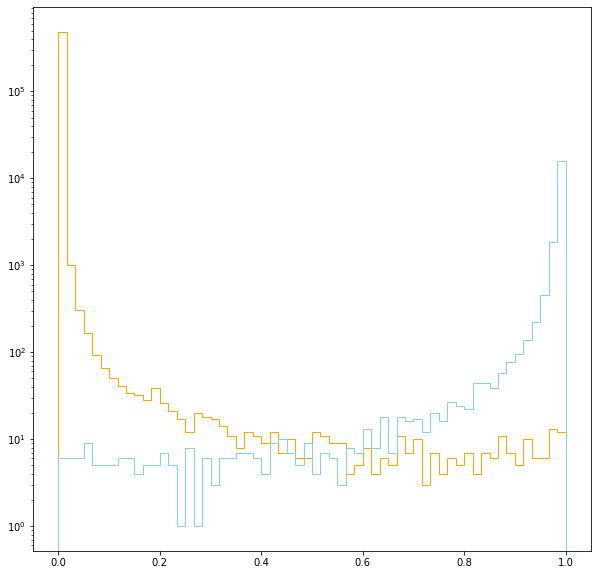

In [29]:
fig = plt.figure( figsize=(10,10) )
plt.hist( y_test_proba[ y_test == 0 ], histtype='step', color='orange', bins=60, range=(0.,1.) )
plt.hist( y_test_proba[ y_test == 1 ], histtype='step', color='skyblue', bins=60, range=(0.,1.) )
plt.yscale('log')

In [30]:
prob_cut = 0.50

y_test_pred = ( y_test_proba >= prob_cut ).astype( "int32" )
print ( y_test_pred )

from sklearn.metrics import accuracy_score
print ( accuracy_score( y_test, y_test_pred ) )
print ( accuracy_score( y_test[ y_test == 1 ], y_test_pred[ y_test == 1 ] ) )
print ( accuracy_score( y_test[ y_test == 0 ], y_test_pred[ y_test == 0 ] ) )

[1 1 1 ... 0 0 0]
0.9992169208534968
0.990895374850424
0.999546576861405


Text(0.5, 0, 'Number of Trees')

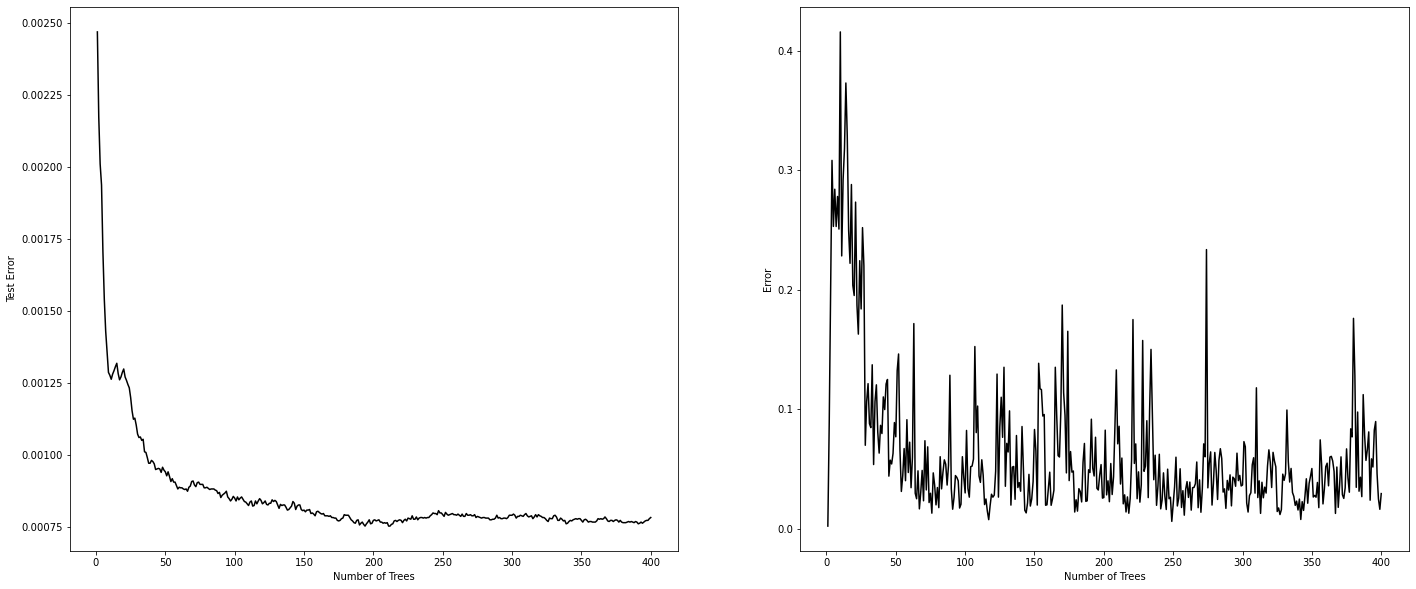

In [31]:
test_errors = []
for test_predict_proba in model_final.staged_predict_proba( X_test ):
    test_errors.append( 1. - accuracy_score( ( test_predict_proba[:,1] >= prob_cut ), y_test ) )

n_trees = len( model_final )

estimator_errors = model_final.estimator_errors_[:n_trees]

plt.figure( figsize=(24, 10) )
plt.subplot(121)
plt.plot( np.arange(1, n_trees + 1), test_errors, c='black' )
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')
#plt.ylim( 0.20, 0.50 )

plt.subplot(122)
plt.plot( np.arange(1, n_trees + 1), estimator_errors, c='black' )
plt.ylabel('Error')
plt.xlabel('Number of Trees')
#plt.ylim( 0.20, estimator_errors.max() * 1.2 )

### Save model

In [32]:
if train_model and save_model:
    dump( model_final, "model/ada_clf.joblib" )

In [ ]:
#dump( model_final, "model/ada_clf.joblib" )

### References

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
np.info( AdaBoostClassifier )

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#np.info( RandomizedSearchCV )
print ( RandomizedSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier( random_state=42 ),
            algorithm="SAMME.R"
            ),
            param_distribs)
      )